In [21]:
import Framework.Confounder_Injection as CI
import Framework.Models as Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import torch

In [22]:
params = [
    [[1, 4], [3, 6]], # real feature
    [[10, 12], [20, 22]] # confounder
    ]

In [23]:
batchsize = 256

In "Validation of synthetic data" the case were the training_data was completely confounded was tested to show that neural networks indeed fit to confounding factors in images. Now the hypothesis is that if we have a small set of unconfounded data we can either use a confounder-free neural network or a DANN to unlearn the confounders. For establishing a performance baseline we need to test the SimpleConv on a dataset consisting of the confounded set and the small unconfounded set, otherwise the conditions would not be equal for the different networks.

# No confounders in target and test_data

In this case there are 512 samples from the source domain (with correlating confounders) and a varying number of samples (16 or 64) from the target domain (with no confounders).

In this case the network is able to achieve the highest possible accuracy. When the confounder is absent the network seems to be able to use the real features for distinguishing the classes and when the confounder is present the network can use it to achieve higher accuracy.

### With 16 training-samples from target population

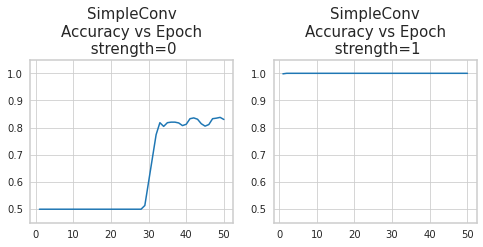

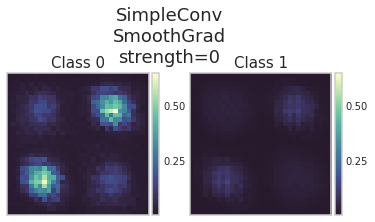

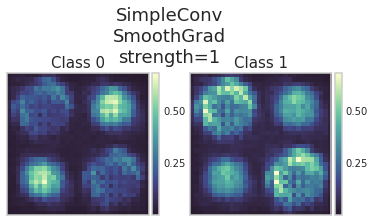

In [24]:
c = CI.confounder()
model = Models.SimpleConv()
c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=16, target_domain_confounding=0, train_confounding=1, test_confounding=[0,1], params=params)
c.train(model=model, epochs=50, batch_size=batchsize, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch = True, smoothgrad=True, saliency_iteration=[0,1])

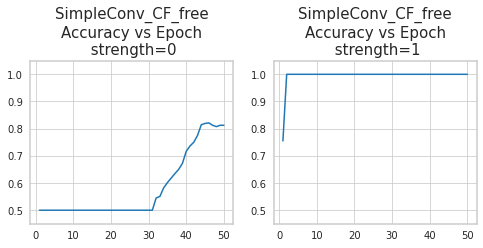

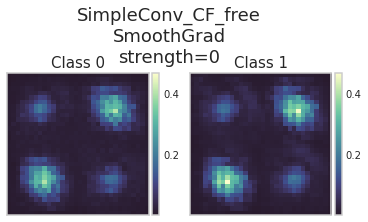

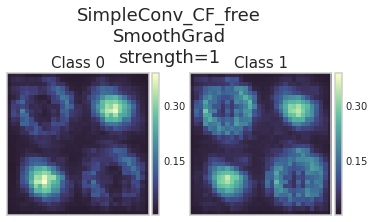

In [25]:
c = CI.confounder()
model = Models.SimpleConv_CF_free(alpha=0.5)
c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=16, target_domain_confounding=0, train_confounding=1, test_confounding=[0,1], params=params)
c.train(model=model, epochs=50, batch_size=batchsize, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch = True, smoothgrad=True, saliency_iteration=[0,1])

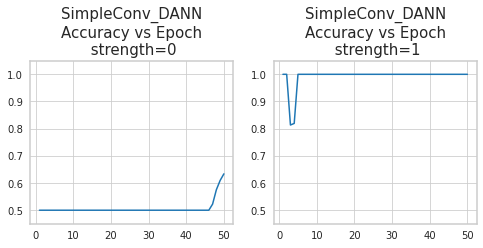

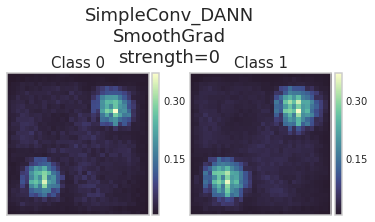

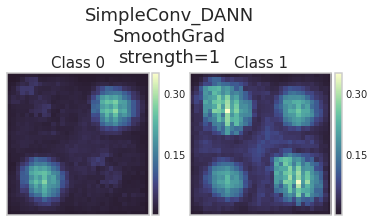

In [26]:
c = CI.confounder()
model = Models.SimpleConv_DANN(alpha=0.7)
c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=16, target_domain_confounding=0, train_confounding=1, test_confounding=[0,1], params=params)
c.train(model=model, epochs=50, batch_size=batchsize, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch = True,  smoothgrad=True, saliency_iteration=[0,1])

# De-correlated confounders in target- and test-data

In this case there are confounders present in the data from target domain and test-set but they are de-correlated with the real features (they are rather distributed by pure chance). This is more representative of real world examples.

In this case the SimpleConv's accuracy diminishes when the confounding strength increases, contrary to the case before. Again the network uses the confounder as approximation, if present. But this time the confounder gives wrong clues about the classes and therefore the network's accuracy drops heavily.

### With 16 training-samples from target population

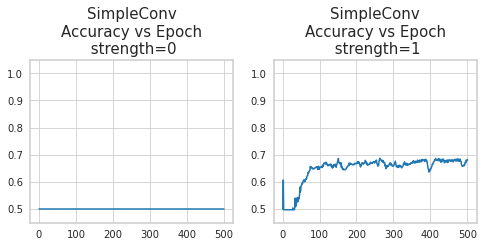

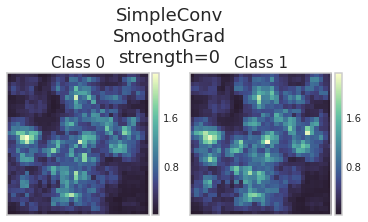

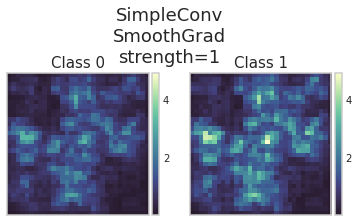

In [27]:
c = CI.confounder()
model = Models.SimpleConv()
c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=16, target_domain_confounding=1, train_confounding=1, test_confounding=[0,1], params=params, de_correlate_confounder_test=True, de_correlate_confounder_target=True)
c.train(model=model, epochs=500, batch_size=batchsize, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch = True, smoothgrad=True, saliency_iteration=[0,1])

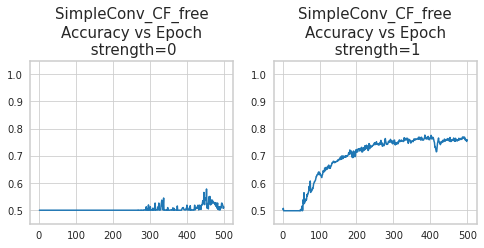

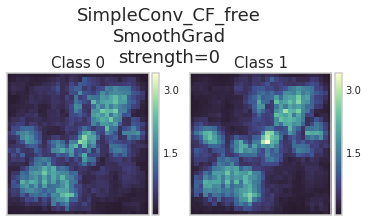

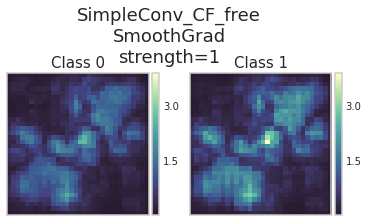

In [28]:
c = CI.confounder()
model = Models.SimpleConv_CF_free(alpha=0.5)
c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=16, target_domain_confounding=1, train_confounding=1, test_confounding=[0,1], params=params, de_correlate_confounder_test=True, de_correlate_confounder_target=True)
c.train(model=model, epochs=500, batch_size=batchsize, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch = True, smoothgrad=True, saliency_iteration=[0,1])

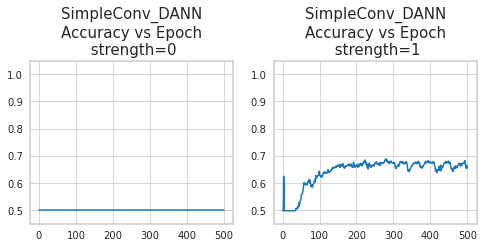

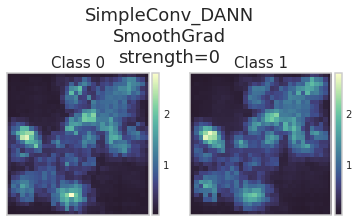

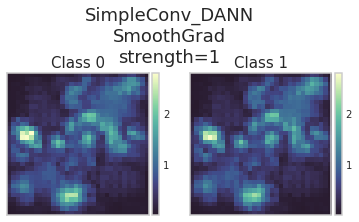

In [29]:
c = CI.confounder()
model = Models.SimpleConv_DANN(alpha=0.7)
c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=16, target_domain_confounding=1, train_confounding=1, test_confounding=[0,1], params=params, de_correlate_confounder_test=True, de_correlate_confounder_target=True)
c.train(model=model, epochs=500, batch_size=batchsize, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch = True, smoothgrad=True, saliency_iteration=[0,1])

### With 128 training-samples from target population

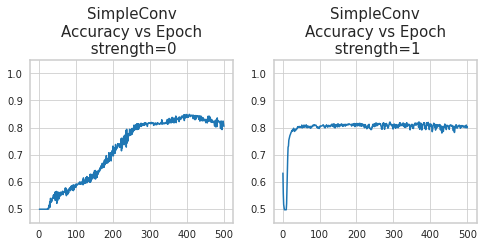

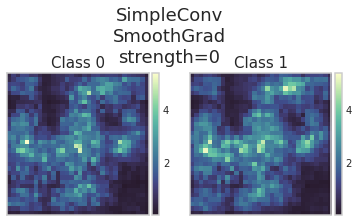

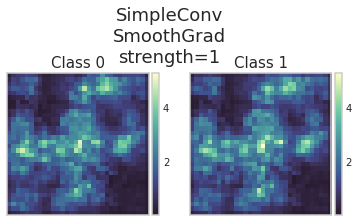

In [30]:
c = CI.confounder()
model = Models.SimpleConv()
c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=128, target_domain_confounding=1, train_confounding=1, test_confounding=[0,1], params=params, de_correlate_confounder_test=True, de_correlate_confounder_target=True)
c.train(model=model, epochs=500, batch_size=batchsize, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch = True, smoothgrad=True, saliency_iteration=[0,1])

In [ ]:
c = CI.confounder()
model = Models.SimpleConv_CF_free(alpha=0.5)
c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=128, target_domain_confounding=1, train_confounding=1, test_confounding=[0,1], params=params, de_correlate_confounder_test=True, de_correlate_confounder_target=True)
c.train(model=model, epochs=500, batch_size=batchsize, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch = True, smoothgrad=True, saliency_iteration=[0,1])

In [ ]:
c = CI.confounder()
model = Models.SimpleConv_DANN(alpha=0.7)
c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=128, target_domain_confounding=1, train_confounding=1, test_confounding=[0,1], params=params, de_correlate_confounder_test=True, de_correlate_confounder_target=True)
c.train(model=model, epochs=500, batch_size=batchsize, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch = True, smoothgrad=True, saliency_iteration=[0,1])